<a href="https://colab.research.google.com/github/MarioROT/CV-MAI/blob/main/Session%201/introduction_to_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Image

This tutorial serves as an **Introduction to Image Processing using Python**. There are several Image Processing Libraries in the Python ecosystem. Some of the popular ones include OpenCV (Open Source Computer Vision), Scikit-Image and PIL (Python Imaging Library). In this course, we would extensively use the functions that are provided with **Scikit-Image Library**.

---

**Scikit-Image** (in short skimage) is a community driven Imaging Library built on top of scipy.ndimage and it provides different routines for various image processing tasks in Python.

In [1]:
%%shell
git clone https://github.com/MarioROT/CV-MAI
mv 'CV-MAI/Session 1/images' /content/
mv 'CV-MAI/Session 1/notebook_images' /content/

Cloning into 'CV-MAI'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 30 (delta 13), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 1.21 MiB | 7.80 MiB/s, done.
Resolving deltas: 100% (13/13), done.


# Importing skimage

skimage is available by default in Colab notebooks. Therefore the library can be invoked directly using the *import* statement

*PS: Follow the instructions on the [Installation section](https://scikit-image.org/docs/stable/install.html) of Scikit-Image to make local installations.*


In [2]:
import skimage
print(skimage.__version__)

0.19.3


# Common Submodules

Most of the routines (functions) are grouped under the different submodules of skimage.

Standard test images are part of the **data** submodule. These images can be directly accessed using function calls.

In [3]:
from skimage import data
camera_image = data.camera()

# What is an Image?

Image is nothing but a **n-dimensional array** of numbers. Each element in the array corresponds to a **pixel**. The row (r) and column (c) corresponds to the **image size** and every r x c plane corresponds to an **image channel**.

Mostly images are used as:

*   **Grayscale Images:** 2D image (r x c) where each pixel corresponds to the intensity.
*   **Color Images (RGB Images):** 2D multi-channel images where the channels correspond to the Red, Green and Blue channels.


# Image Properties

As mentioned above, the images are stored as numpy arrays in skimage. All the possible numpy operations are possible on the image data.

**Exercise #01:**

*   Print the type of the sample image loaded previously
*   Print the shape and size of the image
*   Print the number of channles of the loaded image



In [4]:
# solution
print('ImageType: ',type(camera_image))


ImageType:  <class 'numpy.ndarray'>


# Image Visualization
Viewing manipulated images is an important part of any image processing tool. skimage provides key visualization through different tools available in the Python ecosystem.

For all the experiments in this course, we would use the functions provided by **Matplotlib** library.

Read **[usage](https://matplotlib.org/stable/tutorials/introductory/usage.html)** section to get an introduction to different matplotlib functions.

Get familiar with plots, subplots, setting titles, legends, labels, etc. Also look at the common charts that can be used to understand different problems.

In [5]:
import matplotlib.pyplot as plt

Images are viewed using the **imshow** function available in the pyplot submodule.

**Exercise #02:**

*   Visualize the camera image using **imshow**
*   Change the axis title of the plot as 'camera'



(-0.5, 511.5, 511.5, -0.5)

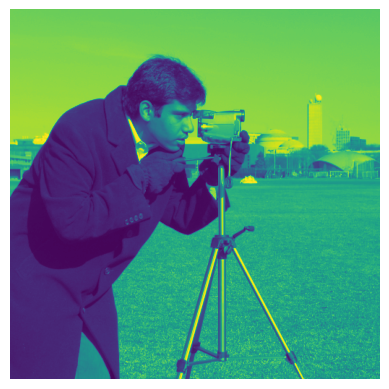

In [6]:
# solution
plt.imshow(camera_image)
plt.axis('off')

**Exercise #03:**


*   Understand the parameters of imshow of pyplot
*   Visualize the loaded image as grayscale image



In [7]:
# solution
# imhow has several parameters the most important are:
# -X: image data
# -cmap: colormap name used to map scalar data to colors
# -norm: normalization method used to scale scalar data to the [0, 1]
# -vmin,vmax: define the data range that the colormap covers
# -aspect; aspect ratio of the Axes
# -interpolation: interpotalion method used to resample the image


### A short tutorial on working with images using Matplotlib is available [here](https://matplotlib.org/stable/tutorials/introductory/images.html) !!!!

### Read [**origin and extend**](https://matplotlib.org/stable/tutorials/intermediate/imshow_extent.html) in imshow to understand the orientations of images in the matplotlib rendering.

# Reading and Writing Images

It is also possible to load images from external sources and also save the manipulated images in different formats. All the supported functions are available in the **io** submodule.

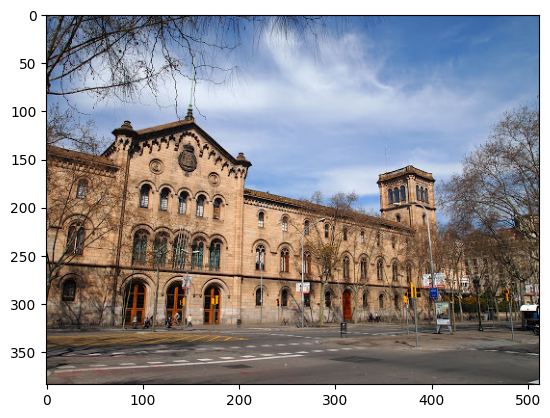

In [8]:
from skimage import io
test_image = io.imread('images/ub.jpg')  # replace with the URL from your drive location
plt.imshow(test_image)
plt.show()

Similarly, images can be saved in different formats using the imsave function.

**Exercise #04:**

*   Create a numpy array of size 256 x 256 x 3 which will hold all the color **white** in all pixels
*   Save the created array as a jpg image in the images folder using **imsave** function.
*   *Remember to use the correct file path corresponding to the G-drive.*



<ipython-input-9-16e9ff16a2dc>:4: UserWarning: images/white_image.png is a low contrast image
  io.imsave('images/white_image.png', white_img*255)


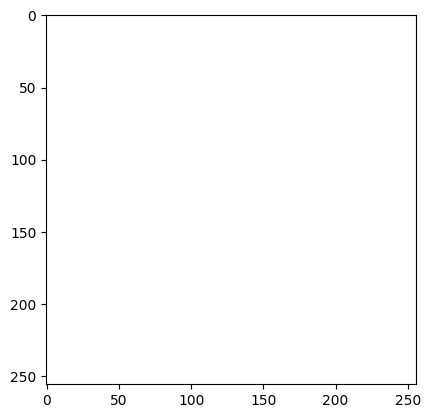

In [9]:
# solution
import numpy as np
white_img = np.ones((256,256,3),dtype=np.uint8)
io.imsave('images/white_image.png', white_img*255)
plt.imshow(white_img*255)

# Image Coordinates
Grayscale images are indexed as r x c where (0,0) corresponds to the top left corner of the image. Please note that this is different from the normal Cartesian Coordinates (x,y).

Read the documentation on **[Numpy for Images crash course](https://scikit-image.org/docs/dev/user_guide/numpy_images.html)** for complete information about standard image manipulations.

# Image Types
In skimage, all images are stored as numpy arrays and supports various data types based on the value of the pixels.

Refer to **[Image Data Types](https://scikit-image.org/docs/dev/user_guide/data_types.html)** for complete information about the Input and Output data types used in image manipulations.

**Exercise #05:**

*   What is the difference between using **skimage.utils.img_as_float** and **np.astype(np.float)**? Why does skimage has its own type conversion function although images are represented as numpy arrays?


**Solution**

*(Double-click or enter to edit)*

...

# Image Transforms

There are several image manipulation utilities such as type conversions available in the **utils** submodule. Another common submodule is the **transform** submodule. The functions available in transform submodule is used to change the spatial and photometric resolution of an image in various scenarios.

Commonly used transforms are resizing the images and rotating the images.


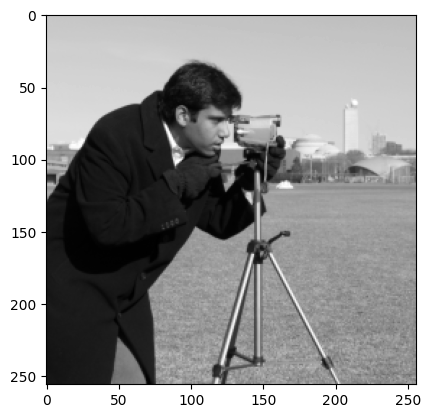

(256, 256) 0.008465512696419247 0.9994933599059728


In [10]:
# Resize the camera image to 256 x 256
from skimage.transform import resize
camera_image_resize = resize(camera_image, (256, 256))
plt.imshow(camera_image_resize, cmap='gray')
plt.show()
print(camera_image_resize.shape, camera_image_resize.min(), camera_image_resize.max())

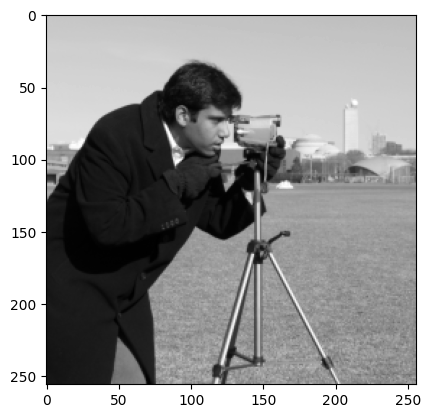

(256, 256) 0.008465512696419247 0.9994933599059728


In [11]:
# Rescale the camera image by a factor of 0.5
from skimage.transform import rescale
camera_image_rescale = rescale(camera_image, 0.5)
plt.imshow(camera_image_rescale, cmap='gray')
plt.show()
print(camera_image_rescale.shape, camera_image_rescale.min(), camera_image_rescale.max())

**Exercise #06:**

*   What is the difference between resize and rescale functions?
*   What happens with preserve_range parameter in both the functions?


**Solution**

- The **rescale** method resizes an image by a specified scaling factor. This can be a single floating-point value applied uniformly, or it can consist of multiple values, where one value is applied along each axis. On the other hand, the **resize** method also resizes an image but provides more flexibility. It allows you to specify the output image shape explicitly, so you can define the exact axes of the resulting image, which may not necessarily maintain the original aspect ratio of the image.

...

*   Rescale the image by a factor of 0.5 with preserve_range parameter enabled and observe the difference.

In [12]:
# solution



# Manipulating intensity values
What happens when we change the pixel values of the image?

Execute the following outputs and observe the difference.

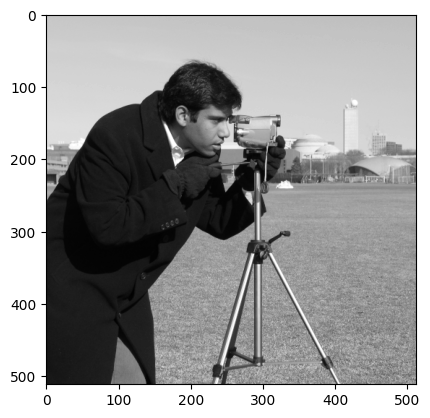

(512, 512) 0 255


In [13]:
plt.imshow(camera_image, cmap='gray')
plt.show()
print(camera_image.shape, camera_image.min(), camera_image.max())

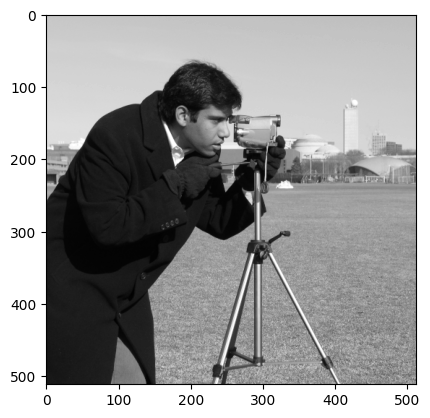

(512, 512) 0.0 127.5


In [49]:
camera_image_2 = camera_image/2  # reducing the intensity by 2
plt.imshow(camera_image_2, cmap='gray')
plt.show()
print(camera_image_2.shape, camera_image_2.min(), camera_image_2.max())

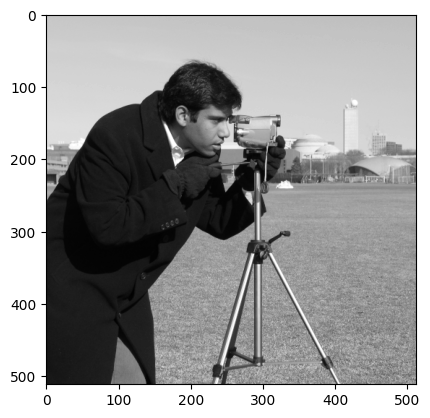

(512, 512) 0.0 63.75


In [15]:
camera_image_3 = camera_image/4  # reducing the intensity by 4
plt.imshow(camera_image_3, cmap='gray')
plt.show()
print(camera_image_3.shape, camera_image_3.min(), camera_image_3.max())

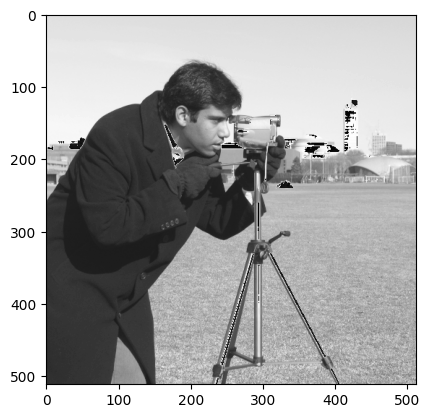

(512, 512) 0 255


In [16]:
camera_image_4 = camera_image + 25  # shifting intensity by +25
plt.imshow(camera_image_4, cmap='gray')
plt.show()
print(camera_image_4.shape, camera_image_4.min(), camera_image_4.max())

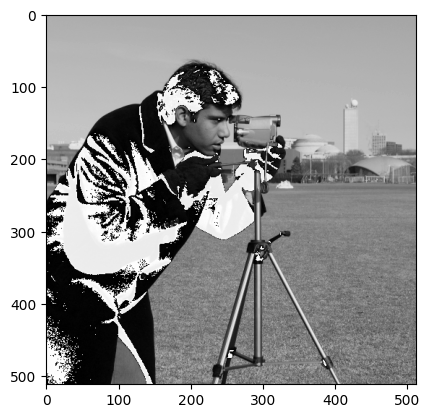

(512, 512) 0 255


In [17]:
camera_image_5 = camera_image - 25  # shifting intensity by -25
plt.imshow(camera_image_5, cmap='gray')
plt.show()
print(camera_image_5.shape, camera_image_5.min(), camera_image_5.max())

In [29]:
camera_image[450:480]

array([[ 23,  25,  23, ..., 116, 145, 141],
       [ 24,  23,  24, ..., 155, 175, 125],
       [ 23,  26,  24, ..., 130, 154, 162],
       ...,
       [ 22,  21,  23, ..., 165, 168, 147],
       [ 21,  22,  21, ..., 177, 175, 163],
       [ 20,  20,  21, ..., 175, 115, 134]], dtype=uint8)

In [30]:
camera_image_3[450:480]

array([[ 5.75,  6.25,  5.75, ..., 29.  , 36.25, 35.25],
       [ 6.  ,  5.75,  6.  , ..., 38.75, 43.75, 31.25],
       [ 5.75,  6.5 ,  6.  , ..., 32.5 , 38.5 , 40.5 ],
       ...,
       [ 5.5 ,  5.25,  5.75, ..., 41.25, 42.  , 36.75],
       [ 5.25,  5.5 ,  5.25, ..., 44.25, 43.75, 40.75],
       [ 5.  ,  5.  ,  5.25, ..., 43.75, 28.75, 33.5 ]])

In [28]:
camera_image_5[450:480,:]

array([[254,   0, 254, ...,  91, 120, 116],
       [255, 254, 255, ..., 130, 150, 100],
       [254,   1, 255, ..., 105, 129, 137],
       ...,
       [253, 252, 254, ..., 140, 143, 122],
       [252, 253, 252, ..., 152, 150, 138],
       [251, 251, 252, ..., 150,  90, 109]], dtype=uint8)

**Exercise #07:**

*   What difference do you observe with the above four operations? How does the change of intensity affect the picture?



**Solution**

As can be seen in the resulting images after the operations of dividing the values by 2 and 4, there are no significant visual changes as the resulting values do not exceed the limits of the range used to render the image and as all the values are updated by the same factor the proportional distances between values are maintained. When applying the +25 and -25 operations, values at the extremes of the accepted range that after the operation exceed these limits are shifted to the other side of the extreme, thus converting whites to blacks and vice versa.

...

**Exercise #08:**

*   Resize the camera_man image to (64, 64)
*   Plot the resized image using matplotlib (in the same scale as the image)
*   Plot the resized image using matplotlib (view the image as 256 x 256)
*   What do you observe between both the plots?



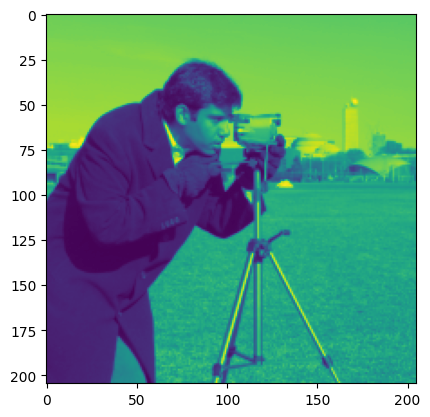

In [51]:
# solution
camera_image64 = resize(camera_image, (64,64))
plt.imshow(camera_image64, cmap='gray')
plt.show()
plt.imshow(camera_image64, cmap='gray')
plt.show()

**Solution**

*(Double-click or enter to edit)*

...

# Color Space Conversions

One of the common tasks in any image processing problem is converting images from one color space to another - the most common one is to convert color images to grayscale, removing alpha channel from the image.

*All the color space functions are available in skimage.color package*

In [ ]:
# converting a rgb image to gray scale

from skimage.color import rgb2gray

img = data.astronaut()
plt.imshow(img)
plt.show()

img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap='gray')
plt.show()

In [ ]:
# converting rgba to rgb

from skimage.color import rgba2rgb
# RGBA has 24 bits for RGB color, bit there is an additional 8 bit value for transparency.

img_rgba = data.logo()
print(img_rgba.shape)
plt.imshow(img_rgba)
plt.show()

img_rgb = rgba2rgb(img_rgba)
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

In [ ]:
# converting rgb to hsv

import numpy as np
from skimage.color import rgb2hsv

# create an array with bright saturated red
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
plt.imshow(red_pixel_rgb)
plt.show()

hsv = rgb2hsv(red_pixel_rgb)
plt.imshow(hsv)
plt.show()

**Exercise #09:**

*   Why do you think there are more than one color representation such as RGB, HSV?



**Solution**

*(Double-click or enter to edit)*

...



---


**It has to be noted that this is not a complete tutorial covering the complete skimage aspects. This is provided as an introduction to skimage and its ease of use in image computations.**